Używane biblioteki

In [2]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Lagrange'a

Wielomian interpolacyjny newtona:
P(x) = L0(x) * y0 + L1(x) * y0 + ... Ln * yn


In [3]:
def lagrange_interpolation(xs, ys, x): 

    if len(xs) != len(ys): return

    P = 0 #Value of a polynomial at point x

    for i in range(len(xs)):

        L = 1 #lagrange's base

        for j in range(len(xs)):

            if xs[i] != xs[j]: 

                L *= (x - xs[j]) / (xs[i] - xs[j])

        P += (L * ys[i])

    return P

Iterpolacja Newtona - metoda ilorazów skończonych

Wielomian interpolacyjny Newtona:

Pn(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)(x - xn)

Wielomian interpolacyjny z ilorazami różnicowymi

Pn(x) = f[x0] + (x - x0)f[x0, x1] + (x - x0)(x - x1)f[x0, x1, x2] + ... + (x - x0)(x - x1)...(x-xn-1)f[x0, x1, ..., xn]

In [4]:
def newton_interpolation(xs, ys, x):

    if len(xs) != len(ys): return

    coefficients = [ys[0]]

    #Dfference quotients array
    diffs = copy.deepcopy(ys)
    
    for i in range(len(xs) -2, -1, -1):

        for j in range(0, i + 1):
            
            diffs[j] = (diffs[j+1] - diffs[j]) / (xs[j + ((len(xs) - i) - 1)] - xs[j])

        coefficients.append(diffs[0])

    #horner
    result = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        result = result * (x - xs[i]) + coefficients[i]

    return result

Równomiernie rozprowadzone punkty

In [5]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n)]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [6]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji danej zbiorem punktow

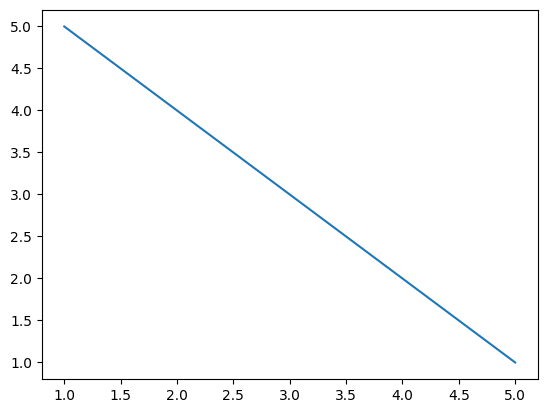

In [7]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

plt.plot(x, y)

Rysowanie funkcji danej wzorem

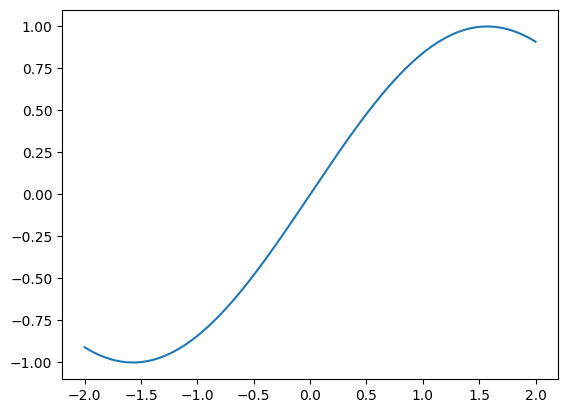

In [8]:
def test_function(x):
    return math.sin(x)

a = -2
b = 2
pts_count = 1000

x = np.linspace(a, b, pts_count)
y = [test_function(x[i]) for i in range(pts_count)]

plt.plot(x, y)

Zadana funkcja

f2(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [9]:
def f2(x, m = 3, k = 1.5):
    return 10 * m + (x**2 / k) - 10 * m * math.cos(k * x)

f2_a = -4 * math.pi
f2_b = 4 * math.pi

Wykres f2

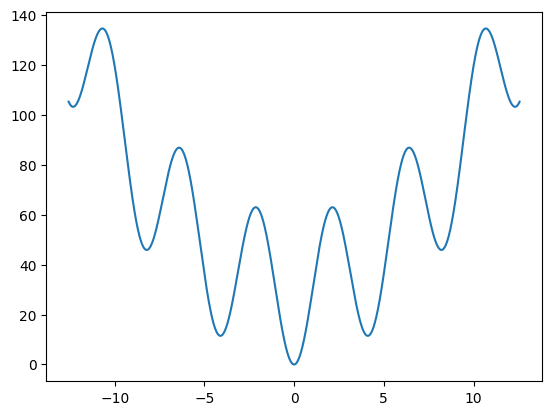

In [11]:
f2_plot_x = np.linspace(f2_a, f2_b, 10000)
f2_plot_y = [f2(f2_plot_x[i]) for i in range(10000)]

plt.plot(f2_plot_x, f2_plot_y)
plt.show()

In [63]:
def interpolate(interpolation_function, point_generation_function, n, test_points_count):
    
    xs = point_generation_function(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = point_generation_function(f2_a, f2_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(interpolation_function(xs, ys, check_x[i]))

    plt.scatter(xs, ys, color = 'black')
    plt.plot(f2_plot_x, f2_plot_y, color = 'blue')
    plt.plot(check_x, check_y, color = 'red')


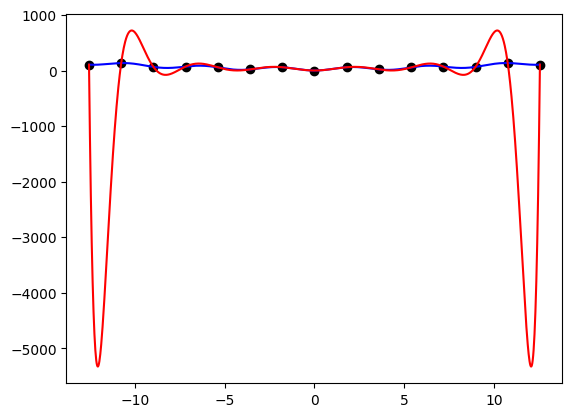

In [58]:
interpolate(lagrange_interpolation, get_evenly_distributed, 15, 1000)
plt.show()

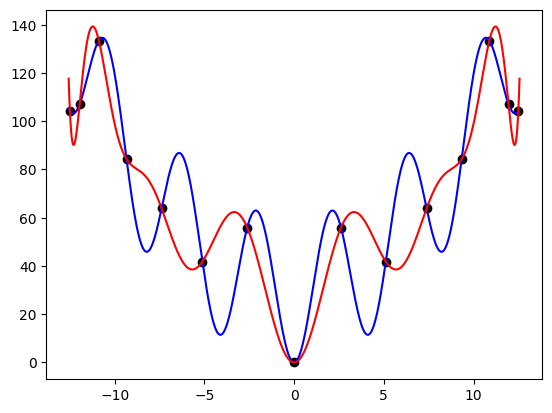

In [59]:
interpolate(lagrange_interpolation, get_chebyshev_nodes, 15, 1000)
plt.show()

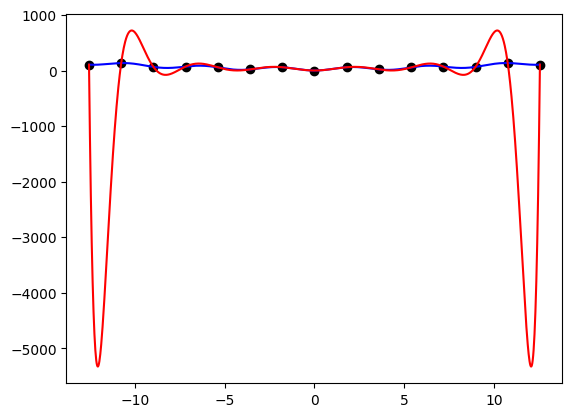

In [61]:
interpolate(newton_interpolation, get_evenly_distributed, 15, 1000)
plt.show()

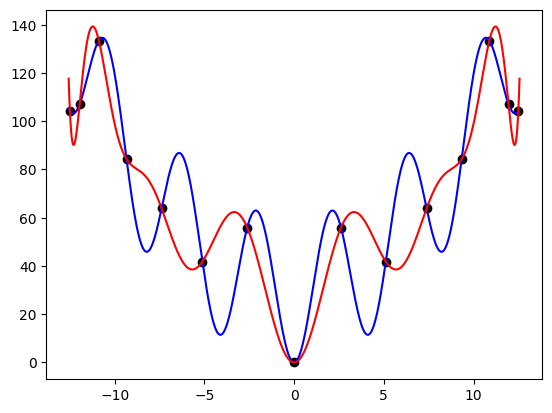

In [62]:
interpolate(newton_interpolation, get_chebyshev_nodes, 15, 1000)

Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Maksumum

1.1 Różnica maksimum dla interpolacji lagrange'a z równomiernie wygenerowanymi węzłami

In [31]:
def interpolation_maximum_difference(interpolation_function, point_generation_function, test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = point_generation_function(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - interpolation_function(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"{N[i]}, {maksimum}")

In [32]:
interpolation_maximum_difference(lagrange_interpolation, get_evenly_distributed, 1000)

3, 59.99866494451233
4, 59.99866494451233
5, 79.10274521603786
6, 59.544049793340825
7, 59.99866494451234
8, 59.98332765229924
9, 46.3393319367777
10, 87.0707003052243
11, 432.1095884663853
12, 275.2502251042611
13, 2675.532194570988
14, 692.4731371549957
15, 5428.9486383151625
16, 2486.945518794252
17, 6245.165299475247
18, 3401.320450106511
19, 4855.062515509533
20, 2876.005879014802
21, 2783.884136437149
22, 1734.8542339390647
23, 1243.0388422984672
24, 799.4310358571277
25, 447.57597115944964
26, 294.4918054458727
27, 133.48740769671755
28, 89.36135324541554
29, 33.61891954562316
30, 22.822364183413228


In [33]:
interpolation_maximum_difference(lagrange_interpolation, get_chebyshev_nodes, 1000)

3, 72.64250345658013
4, 50.25388839518411
5, 56.80816174269654
6, 54.52857743041818
7, 55.04581340044575
8, 63.209755337423566
9, 64.15438627229435
10, 64.2517715680423
11, 57.12295689109577
12, 61.27650135763643
13, 57.50068970044197
14, 73.3439742849674
15, 46.14379846805522
16, 58.33469495756625
17, 26.61726964847537
18, 30.789706720184363
19, 10.995912118275854
20, 11.542434467375058
21, 3.4397025368894703
22, 3.250909406562307
23, 0.8348324917244554
24, 0.7169977482207028
25, 0.16285377204542328
26, 0.12771813781837185
27, 0.025817149359852465
28, 0.01881542808296907
29, 0.0033892696719419746
30, 0.002335873291422097


In [34]:
interpolation_maximum_difference(newton_interpolation, get_evenly_distributed, 1000)

3, 59.99866494451233
4, 59.99866494451234
5, 79.10274521603783
6, 59.54404979334081
7, 59.99866494451237
8, 59.98332765229924
9, 46.339331936777754
10, 87.0707003052259
11, 432.1095884663957
12, 275.2502251042613
13, 2675.5321945709816
14, 692.4731371555825
15, 5428.94863831516
16, 2486.9455187951403
17, 6245.165299483856
18, 3401.320450131733
19, 4855.062515587796
20, 2876.005879120314
21, 2783.8841364371306
22, 1734.854234048541
23, 1243.0388422983965
24, 799.4310358569255
25, 447.5759712864261
26, 294.49180623715654
27, 133.4874076937429
28, 89.36135324469673
29, 33.618919535343764
30, 22.82236416908691


In [35]:
interpolation_maximum_difference(newton_interpolation, get_chebyshev_nodes, 1000)

3, 72.64250345658013
4, 50.25388839518412
5, 56.808161742696555
6, 54.528577430418196
7, 55.045813400445695
8, 63.209755337423616
9, 64.15438627229521
10, 64.25177156804216
11, 57.122956891095654
12, 61.276501357636974
13, 57.50068970046395
14, 73.34397428496973
15, 46.14379846806605
16, 58.33469495757428
17, 26.617269649062692
18, 30.78970672018467
19, 10.995912123210829
20, 11.542434467444743
21, 3.439702536889456
22, 3.250909406633202
23, 0.8348324917243701
24, 0.7169977482226599
25, 0.1628540821683373
26, 0.127718137882173
27, 0.02581714935979562
28, 0.018815428503220488
29, 0.0033892696718567095
30, 0.002335873402291355


2. Błąd średniokwadratowy

In [26]:
def interpolation_mean_difference(interpolation_function, point_generation_function, test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        suma = 0

        #Evenly distributed xs
        xs = point_generation_function(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            suma += (f2(test_x[j]) - interpolation_function(xs, ys, test_x[j])) ** 2
    
        print(f"{N[i]}, {suma / test_points_count}")

In [27]:
interpolation_mean_difference(lagrange_interpolation, get_evenly_distributed, 1000)

3, 1348.6499999999985
4, 1348.6499999999987
5, 1284.9229081356216
6, 926.3865101408779
7, 1348.6499999999985
8, 897.4519337516629
9, 850.9355556984665
10, 1886.309236392329
11, 18918.64456208366
12, 6706.342390896908
13, 531738.1929584887
14, 34521.64893763166
15, 1786147.5815064595
16, 355627.6224411514
17, 1999882.5977893367
18, 565062.5706107061
19, 1047210.9372952617
20, 351959.4603801114
21, 303812.6932804963
22, 113273.08920198637
23, 54103.14177527047
24, 21610.53048661355
25, 6337.3839964478075
26, 2658.350327923829
27, 513.3733346018715
28, 223.34386720386627
29, 29.880301891256565
30, 13.370541317585324


In [28]:
interpolation_mean_difference(lagrange_interpolation, get_chebyshev_nodes, 1000)

3, 981.3775797922227
4, 694.4297869596238
5, 708.267264455637
6, 713.7392517912432
7, 766.4267567232654
8, 860.1827799323668
9, 998.0056040384796
10, 829.4238641735868
11, 737.8470463804014
12, 694.3009371302653
13, 600.9644354909683
14, 595.5398920072695
15, 546.217113718484
16, 485.2672502337951
17, 224.60201727712152
18, 185.5673651110922
19, 40.77072181890504
20, 32.516295737441894
21, 3.8328052064210056
22, 2.998574653699404
23, 0.20985206807929843
24, 0.162262763975682
25, 0.007257151949043576
26, 0.00556792908616641
27, 0.00016806584276443147
28, 0.00012823864768313957
29, 2.724125113355272e-06
30, 2.0701106073174183e-06


In [29]:
interpolation_mean_difference(newton_interpolation, get_evenly_distributed, 1000)

3, 1348.6499999999985
4, 1348.6499999999992
5, 1284.9229081356211
6, 926.3865101408785
7, 1348.6499999999987
8, 897.4519337516628
9, 850.9355556984668
10, 1886.3092363923313
11, 18918.644562084057
12, 6706.342390895771
13, 531738.1929584028
14, 34521.64893765869
15, 1786147.581506252
16, 355627.6224412476
17, 1999882.597789161
18, 565062.5706137568
19, 1047210.9373094225
20, 351959.4603895753
21, 303812.6932782207
22, 113273.08920724226
23, 54103.141775132215
24, 21610.530487026874
25, 6337.383991162863
26, 2658.3503276346128
27, 513.373328710636
28, 223.34386624325626
29, 29.88030014901397
30, 13.370540673885886


In [30]:
interpolation_mean_difference(newton_interpolation, get_chebyshev_nodes, 1000)

3, 981.3775797922231
4, 694.4297869596238
5, 708.2672644556366
6, 713.7392517912429
7, 766.4267567232656
8, 860.1827799323719
9, 998.0056040384845
10, 829.4238641735717
11, 737.8470463803985
12, 694.3009371302555
13, 600.9644354909277
14, 595.5398920071945
15, 546.2171137186687
16, 485.2672502338431
17, 224.6020172769919
18, 185.56736511061735
19, 40.77072181954482
20, 32.51629573698405
21, 3.832805208581603
22, 2.9985746544869016
23, 0.20985206942217333
24, 0.16226276539277207
25, 0.007257152002536599
26, 0.005567929980303924
27, 0.0001680662164508923
28, 0.00012823856379409212
29, 2.7242051298515353e-06
30, 2.070132032722041e-06
